/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

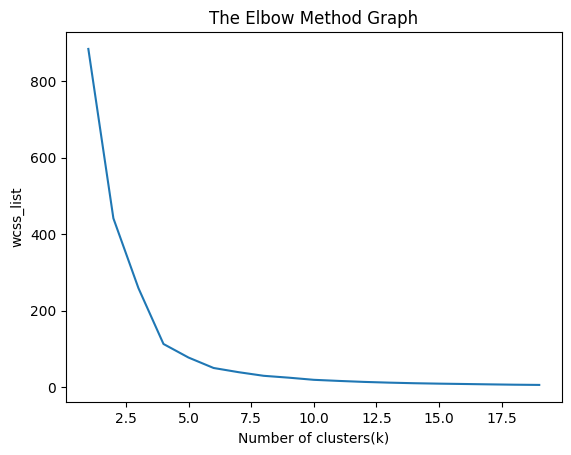

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


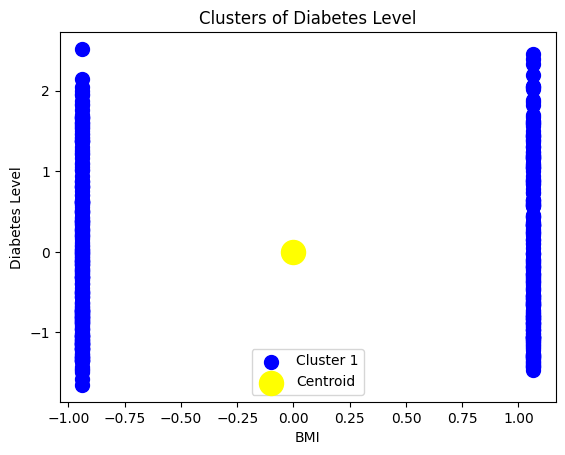

In [4]:
# From https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes_ds = datasets.load_diabetes()

# Load the diabetes dataset
df_X = pd.DataFrame(data=diabetes_ds.data, columns=diabetes_ds.feature_names)
df_y = pd.DataFrame(data=diabetes_ds.target, columns=['Target'])
df_X.insert(len(df_X.columns),'Target',df_y.values)
# print(df_X.head())

# we are extracting the BMI feature compared to the Diabetes Level
x = df_X.iloc[:, [1,10]].values

# Scale the data using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
# print(x)

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
    
plt.plot(range(1, 20), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=1, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Diabetes Level')  
plt.xlabel('Your chosen feature')  
plt.ylabel('Diabetes Level')  
plt.legend()  
plt.show()